In [1]:
# Speed by runtime type, useful if you're running something big.

# A100: 23299 steps in 3:00:00. Approx. 2 steps per second.
# L4:   19:25 to 750 steps. Approx. 0.6 steps per second.
# CPU, T4 (OOM), and TPUs not supported

In [2]:
%%capture
%cd /content/
#@title Setup
!mkdir dataset
!mkdir dataset/image
!mkdir dataset/conditioning
!mkdir dataset/prompts
!git clone https://github.com/MatthewCWeston/ControlNet-Trainer-2025.git
%cd ControlNet-Trainer-2025
!mkdir output
!mkdir logs
!pip install -r requirements.txt

## Download Test Dataset

In [3]:
# Download a test dataset
from huggingface_hub import login, hf_hub_download
hf_hub_download(repo_id='lllyasviel/ControlNet',filename='training/fill50k.zip',local_dir='/content/')

training/fill50k.zip:   0%|          | 0.00/229M [00:00<?, ?B/s]

'/content/training/fill50k.zip'

In [4]:
!unzip -q /content/training/fill50k.zip

## Continue

In [ ]:
%cd ControlNet-Trainer-2025
import json, os

In [6]:
#@title Dataset
dataset_conditioning_folder = "/content/ControlNet-Trainer-2025/fill50k" #@param {type:"string"}
dataset_target_folder = "/content/ControlNet-Trainer-2025/fill50k" #@param {type:"string"}
dataset_captions_json = "/content/ControlNet-Trainer-2025/fill50k/prompt.json" #@param {type:"string"}
print('Folders set!')
print(f'Conditionings: {dataset_conditioning_folder}')
print(f'Targets: {dataset_target_folder}')
print(f'Prompts: {dataset_captions_json}')

Folders set!
Conditionings: /content/ControlNet-Trainer-2025/fill50k
Targets: /content/ControlNet-Trainer-2025/fill50k
Prompts: /content/ControlNet-Trainer-2025/fill50k/prompt.json


In [7]:
#@title Options
project_name = "default" #@param {type:"string"}
run_name = "" #@param {type:"string"}
sd_version = "2.1" #@param ["2.1", "1.5"]
output_dir = "/content/ControlNet-Trainer-2025/output" #@param {type:"string"}
logging_dir = "/content/ControlNet-Trainer-2025/logs" #@param {type:"string"}
resume_ckpt = "latest" #@param {type:"string"}

wandb_key = "" #@param {type:"string"}
resolution = 512 #@param {type:"integer"}
batch_size = 3 #@param {type:"integer"}
image_logger_freq = 500 #@param {type:"integer"}
log_every_n_steps = 100 #@param {type:"integer"}
learning_rate = 1e-5 #@param
max_steps = 9000 #@param {type:"integer"}
max_epochs = 10 #@param {type:"integer"}
wipe_older_ckpts = False #@param {type:"boolean"}

save_memory = False #@param {type:"boolean"}
image_logger_disabled = False #@param {type:"boolean"}
save_ckpt_every_n_steps = 2000 #@param {type:"integer"}
save_top_k = -1 #@param {type:"integer"}
save_weights_only = False #@param {type:"boolean"}
save_last = False #@param {type:"boolean"}
sd_locked = True #@param {type:"boolean"}
only_mid_control = False #@param {type:"boolean"}
gradient_accumulation_steps = 1

multi_gpu = False #@param {type:"boolean"}

config = {
    "project_name": project_name,
    "run_name": run_name,
    "sd_version": sd_version,
    "output_dir": output_dir,
    "logging_dir": logging_dir,
    "resume_ckpt": resume_ckpt,
    "dataset_conditioning_folder": dataset_conditioning_folder,
    "dataset_target_folder": dataset_target_folder,
    "dataset_captions_json": dataset_captions_json,
    "wandb_key": wandb_key,
    "resolution": resolution,
    "save_memory": save_memory,
    "batch_size": batch_size,
    "image_logger_disabled": image_logger_disabled,
    "image_logger_freq": image_logger_freq,
    "log_every_n_steps": log_every_n_steps,
    "learning_rate": learning_rate,
    "max_steps": max_steps,
    "max_epochs": max_epochs,
    "save_ckpt_every_n_steps": save_ckpt_every_n_steps,
    "save_top_k": save_top_k,
    "save_weights_only": save_weights_only,
    "save_last": save_last,
    "sd_locked": sd_locked,
    "only_mid_control": only_mid_control,
    "gradient_accumulation_steps": gradient_accumulation_steps,
    "wipe_older_ckpts": wipe_older_ckpts,
    "multi_gpu": multi_gpu,
}

In [8]:
#@title Save Config
!mkdir -p configs

config_name = "default_config" #@param {type:"string"}

# Save the dictionary to a json file
with open(f'configs/{config_name}.json', 'w') as f:
    json.dump(config, f, indent=4)

print(f'Config saved as configs/{config_name}.json!')

Config saved as configs/default_config.json!


In [9]:
#@title Start Training
training_config = "default_config" #@param {type:"string"}
!python train.py configs/{training_config}.json

# Example outputs at different stages of the training process

### Global Step = 1

At **gs = 1**, there's no notion of the target dataset. The prompts themselves provide some guidance as to what to generate, but the conditioning images are not used and the style deviates greatly from what is desired.

**Output:**

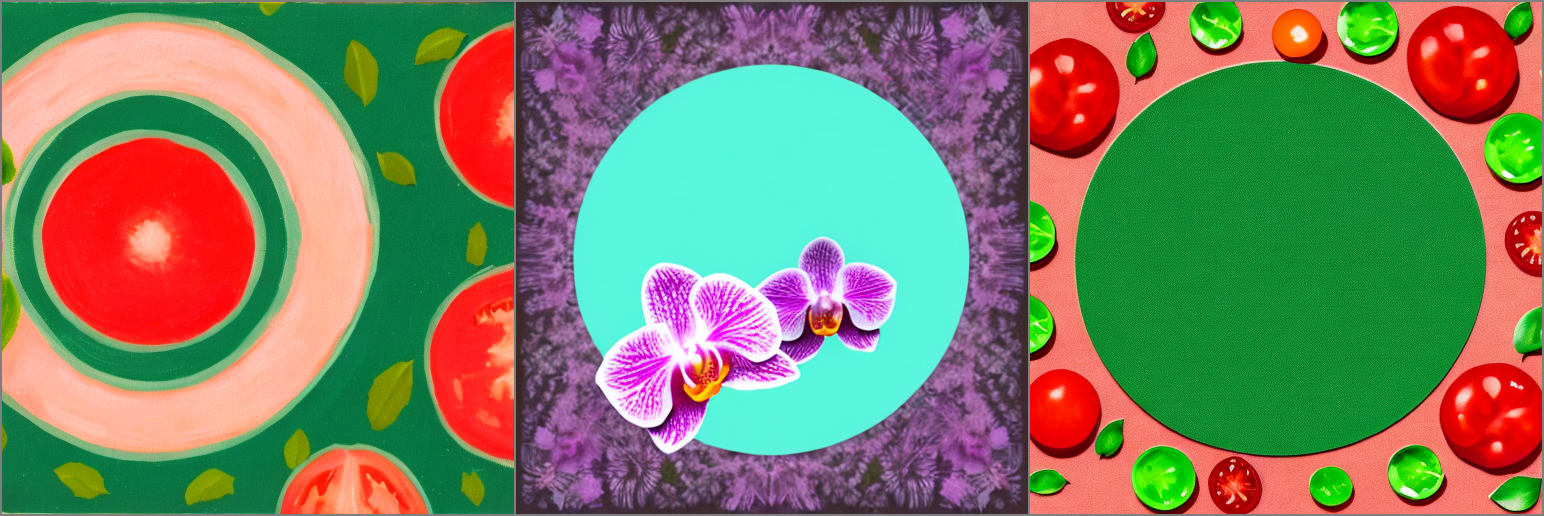

**Target:**

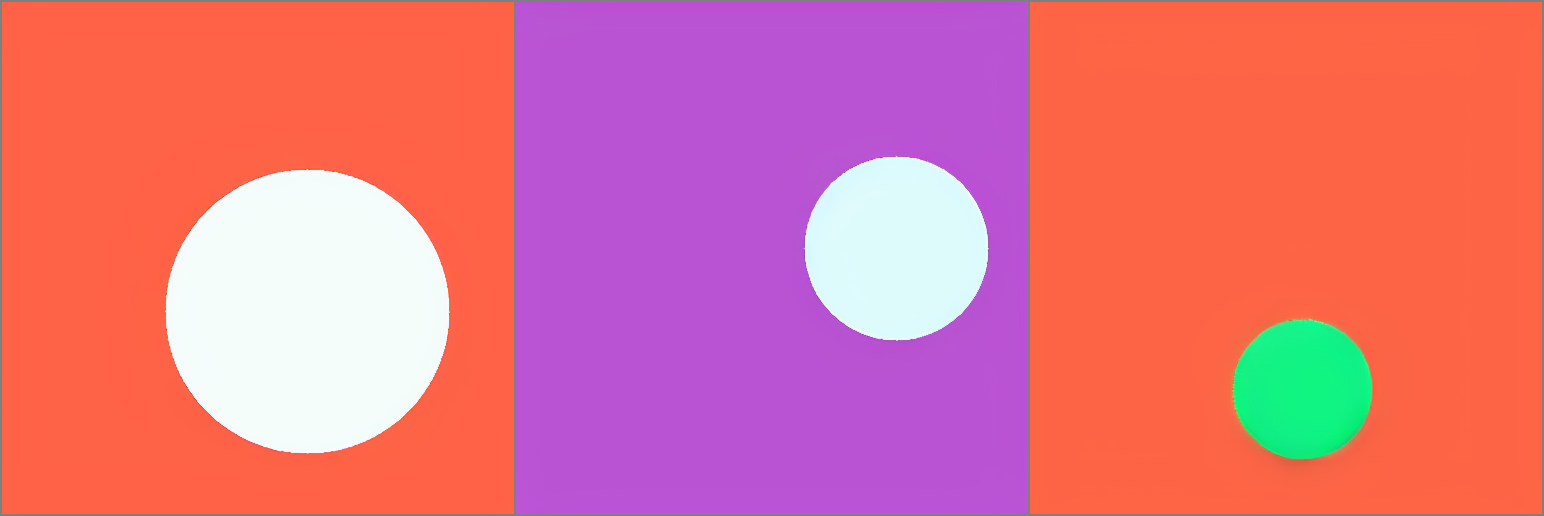

### Global Step = 5501
By **gs = 5501**, the ControlNet has quelled the model's tendencies towards improvization, and it has converged to the target 'style'. However, the content of the prompt is not yet understood properly, nor is the control image. Circles are in the wrong places, and colors are frequently swapped or misidentified.

**Output:**

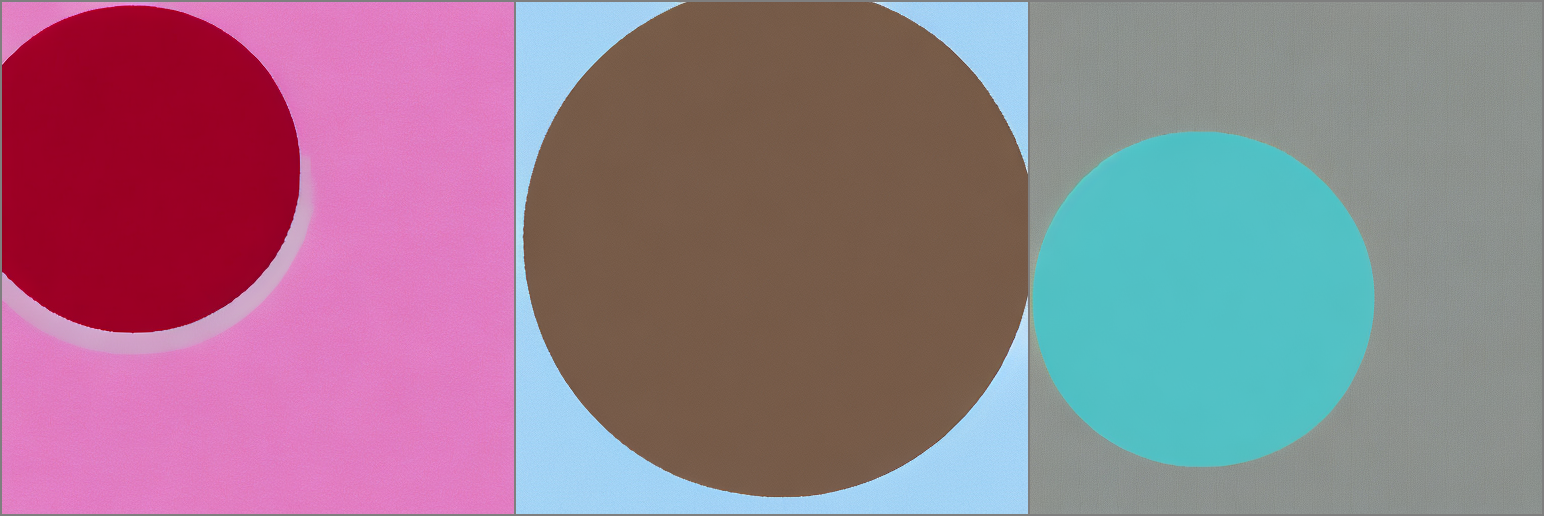

**Target:**

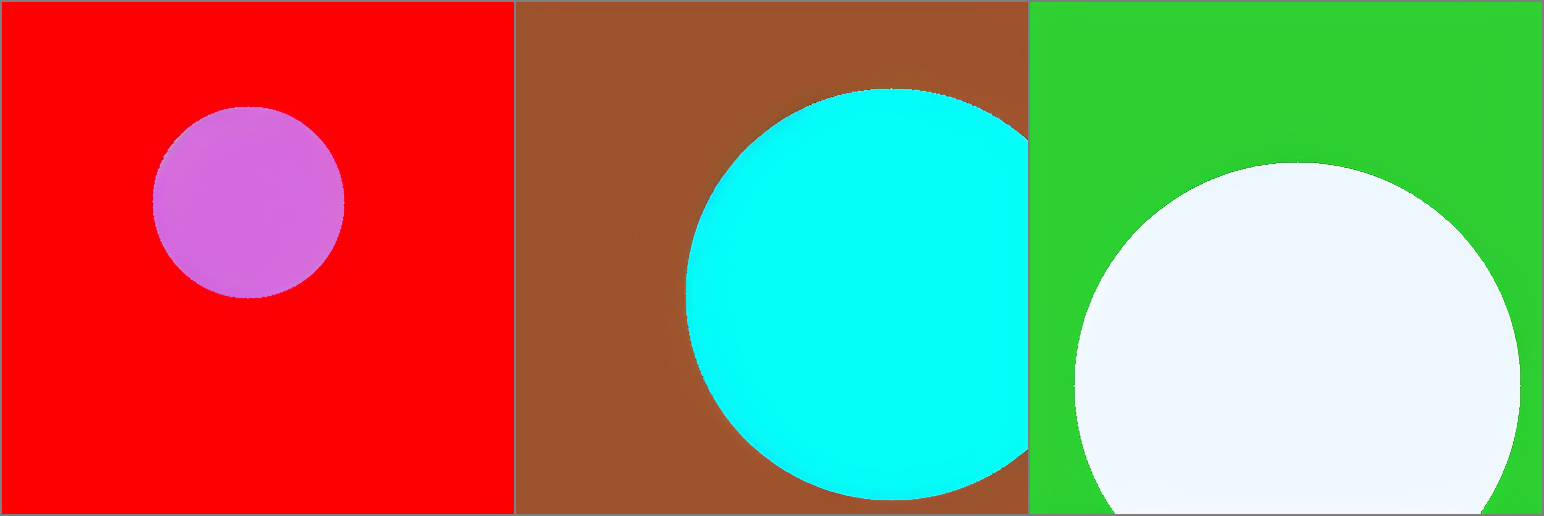

### Global Step = 9001

Around **gs = 9001**, the model suddenly groks the importance of the control image, which indicates circles' positions and sizes. The colors are still imperfect, but the outputs and the goal images are now flawlessly aligned.

**Output:**

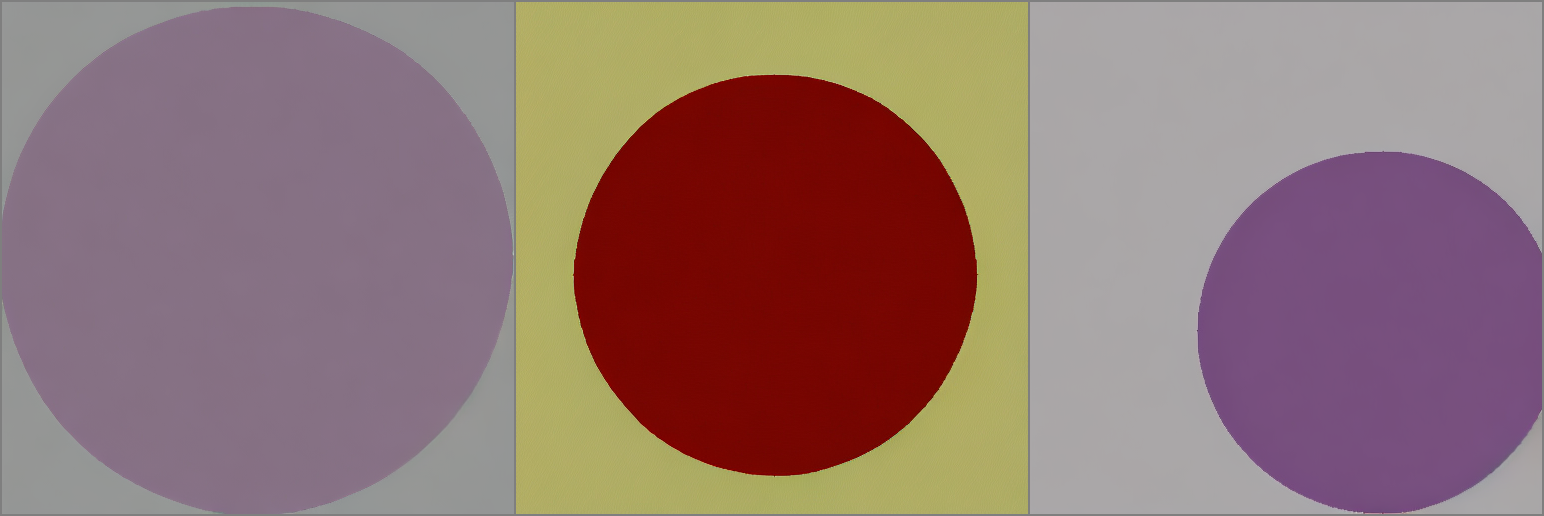

**Target:**

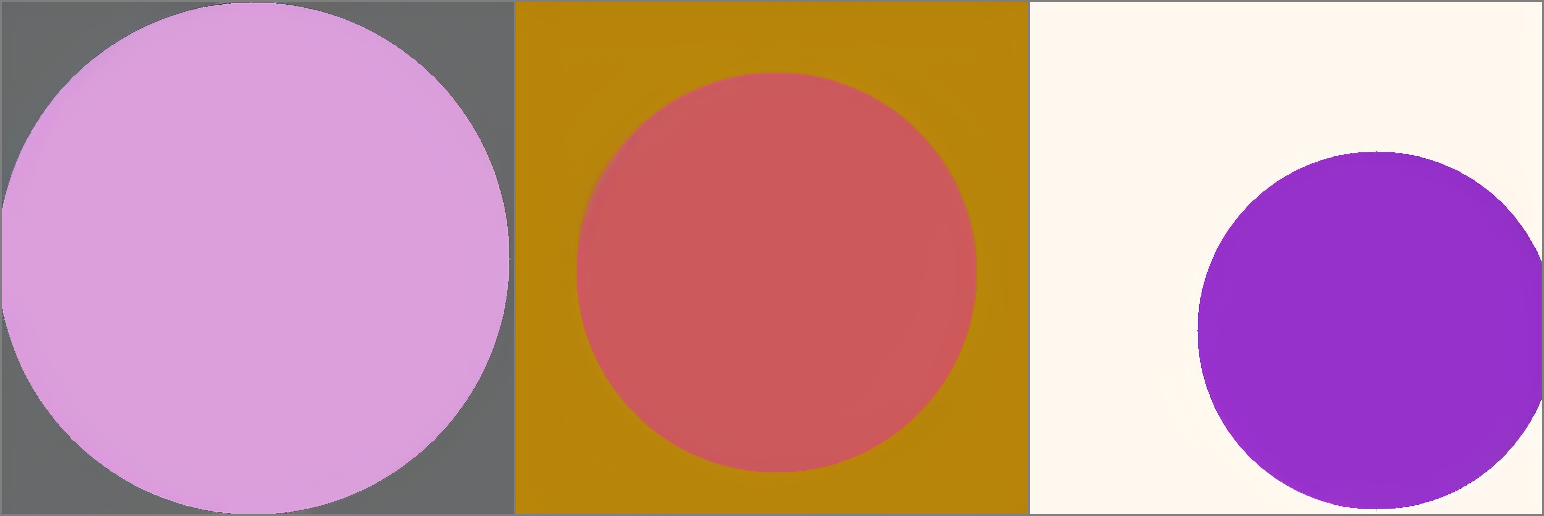

### Global Step = 21168

At **gs = 21168**, we see a nearly perfect output. Of course, it will take a while before this is consistent, but the model is slowly learning the subtleties of the prompt.

**Output:**

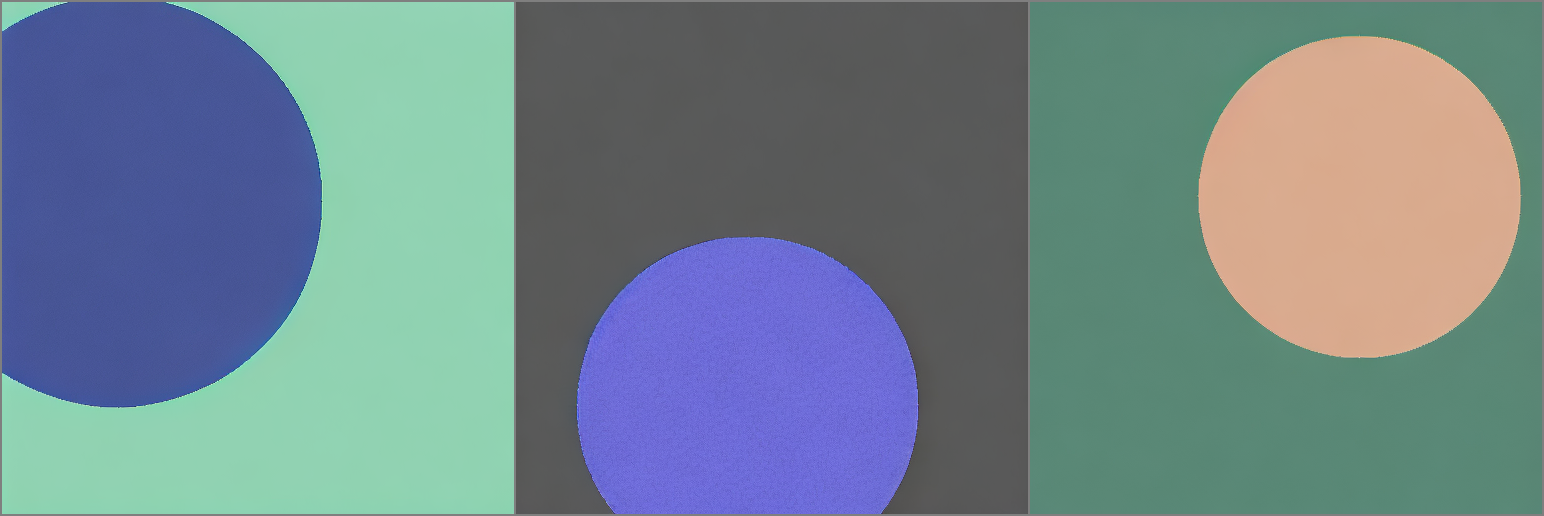

**Target:**

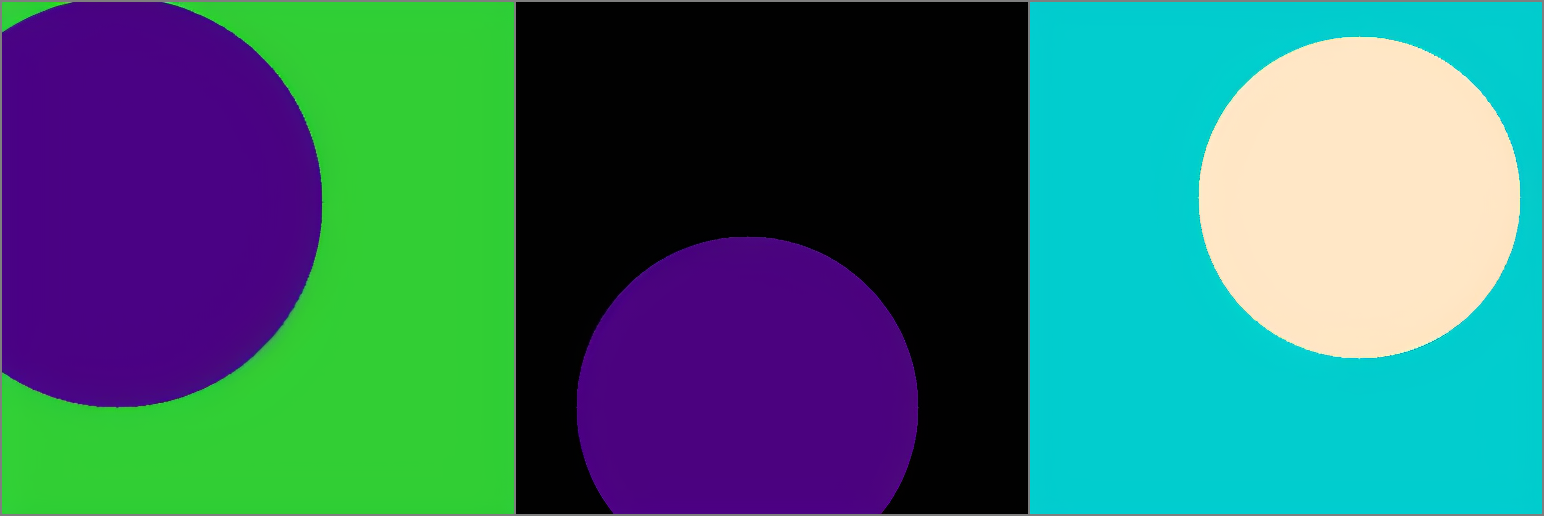